<a href="https://colab.research.google.com/github/renanteod/GCollab/blob/main/roteiro02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roteiro Redes Neurais e Deep Learning**
## Utilizar este Notebook para executar os comandos.
**Arquivo de referência:** *Roteiro Redes Neurais e Deep Learning.docx*

In [1]:
import torch
import keras
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, MaxPool2D, Conv2D, GlobalMaxPool2D, Flatten, Dropout
from keras import ops, layers

from tensorflow.keras.datasets import mnist

In [2]:
model = Sequential(
    [
        Input(shape=(784,)),
        Dense(4, activation= 'relu', name='intermediária 1'),
        Dense(2)
    ]
)

In [3]:
model1 = Sequential()

In [4]:
model1.add(Dense(4, activation= 'relu'))

In [5]:
model1.add(Dense(2))

In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ intermediária 1 (Dense)         │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,150 (12.30 KB)

 Trainable params: 3,150 (12.30 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
print(model1.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
x = ops.ones((1,784))

In [9]:
model.weights

[<Variable path=sequential/intermediária 1/kernel, shape=(784, 4), dtype=float32, value=[[-0.06003432 -0.02485306  0.06221119  0.0109719 ]
  [ 0.06417659  0.06735311 -0.07228518  0.04667842]
  [ 0.04743889 -0.06412679  0.04469484 -0.00838304]
  ...
  [ 0.0212903  -0.07602766  0.07666555 -0.0454288 ]
  [ 0.02145514  0.0289514   0.04214661 -0.05498198]
  [-0.03604747  0.04653966 -0.00813212  0.00044721]]>,
 <Variable path=sequential/intermediária 1/bias, shape=(4,), dtype=float32, value=[0. 0. 0. 0.]>,
 <Variable path=sequential/dense/kernel, shape=(4, 2), dtype=float32, value=[[-0.7509694   0.3583429 ]
  [-0.25536895 -0.9882095 ]
  [ 0.4681654  -0.34313202]
  [-0.13095498  0.09869409]]>,
 <Variable path=sequential/dense/bias, shape=(2,), dtype=float32, value=[0. 0.]>]

In [10]:
y = model(x)
print(y)

tf.Tensor([[ 1.5443211 -1.1314074]], shape=(1, 2), dtype=float32)


In [11]:
import torch
import tensorflow as tf
import os
import numpy as np
import keras
from keras import layers, ops

In [12]:
inputs = keras.Input (shape=(784,), name= 'digits')
x = layers.Dense(128, activation= 'relu', name= 'intermediaria_1')(inputs)
x = layers.Dense(128, activation='relu', name= 'intermediaria_2')(x)
x = layers.Dense(64, activation='relu', name= 'intermediaria_3')(x)
x = layers.Dense(32, activation='relu', name= 'intermediaria_4')(x)
output = layers.Dense(10, activation='softmax', name= 'predictions')(x)

model = keras.Model(inputs=inputs, outputs=output)

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [15]:
model.compile(
	optimizer=keras.optimizers.RMSprop(),
	loss=keras.losses.SparseCategoricalCrossentropy(),
	metrics=[keras.metrics.SparseCategoricalAccuracy()],
)



In [18]:
history = model.fit(
	x_train,
	y_train,
	batch_size=64,
	epochs=18,
	validation_data=(x_val, y_val),
)


Epoch 1/18
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0253 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9763
Epoch 2/18
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0230 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.1286 - val_sparse_categorical_accuracy: 0.9751
Epoch 3/18
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0189 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.1284 - val_sparse_categorical_accuracy: 0.9760
Epoch 4/18
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0180 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.1367 - val_sparse_categorical_accuracy: 0.9749
Epoch 5/18
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0138 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.1228 - val_sparse_categorical_accuracy: 0.9796
Epoch 6/18
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0122 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.1492 - val_sparse_categorical_accuracy: 0.9761
Epoc

In [19]:
print(history.history)
results = model.evaluate(x_test, y_test, batch_size=128)
predictions = model.predict(x_test[:3])
print('test loss, test acc: ', results, ' | predictions shape: ', predictions.shape)


{'loss': [0.027808688580989838, 0.024977389723062515, 0.02038041688501835, 0.019750069826841354, 0.01709575764834881, 0.014988531358540058, 0.015333752147853374, 0.013621092773973942, 0.012465453706681728, 0.012439345940947533, 0.010819679126143456, 0.009797653183341026, 0.010455802083015442, 0.008261547423899174, 0.007545482367277145, 0.0075981467962265015, 0.00811631791293621, 0.005741486791521311], 'sparse_categorical_accuracy': [0.9914799928665161, 0.9925000071525574, 0.9939600229263306, 0.9938200116157532, 0.9949399828910828, 0.9958999752998352, 0.9955999851226807, 0.9958199858665466, 0.9964200258255005, 0.9964399933815002, 0.9970200061798096, 0.9973999857902527, 0.9970200061798096, 0.9979199767112732, 0.997759997844696, 0.9978200197219849, 0.9975200295448303, 0.9981799721717834], 'val_loss': [0.10279639810323715, 0.12863633036613464, 0.12844805419445038, 0.13674402236938477, 0.12280876189470291, 0.14918780326843262, 0.15483658015727997, 0.15372349321842194, 0.15774932503700256, 0

In [20]:
print(predictions)

[[3.64016709e-24 8.40833182e-22 1.41808486e-24 4.59913039e-23
  4.67900965e-31 5.99112278e-31 6.63070611e-40 1.00000000e+00
  7.65196282e-29 3.61641449e-25]
 [2.04201918e-31 1.02153416e-29 1.00000000e+00 4.19919561e-18
  6.41195508e-33 6.24848927e-31 1.99763341e-30 1.42842572e-34
  1.15128246e-23 9.34412721e-39]
 [5.87132949e-14 1.00000000e+00 1.16749088e-09 1.81787068e-11
  1.43141385e-13 1.76311380e-15 6.59992191e-16 8.66216543e-10
  1.59947011e-09 2.85161739e-14]]


In [28]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

print(x_train.shape)
print(x_test.shape)

x_train = x_train/255
x_test = x_test/255


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [30]:
model=Sequential()
model.add(Conv2D(32,3,activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)


In [33]:
processo = model.fit(x_train, y_train, epochs=20, validation_split= 0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8994 - loss: 0.3413 - val_accuracy: 0.9835 - val_loss: 0.0652
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0611 - val_accuracy: 0.9858 - val_loss: 0.0539
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0363 - val_accuracy: 0.9873 - val_loss: 0.0463
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9873 - val_loss: 0.0531
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9873 - val_loss: 0.0525
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.9858 - val_loss: 0.0620
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0088 - val_accuracy: 0.9880 - val_loss: 0.0551
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9981 - loss: 0.0057 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0778
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


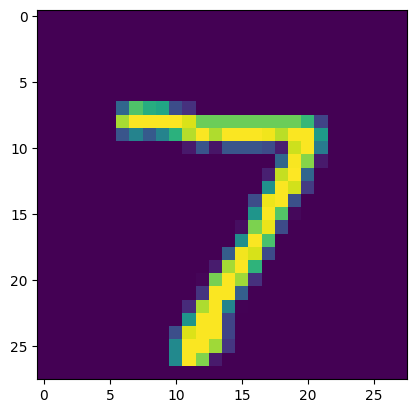

In [34]:
model.evaluate(x_test,y_test)
model.predict(x_test[:1])
plt.imshow(x_test[0].squeeze())

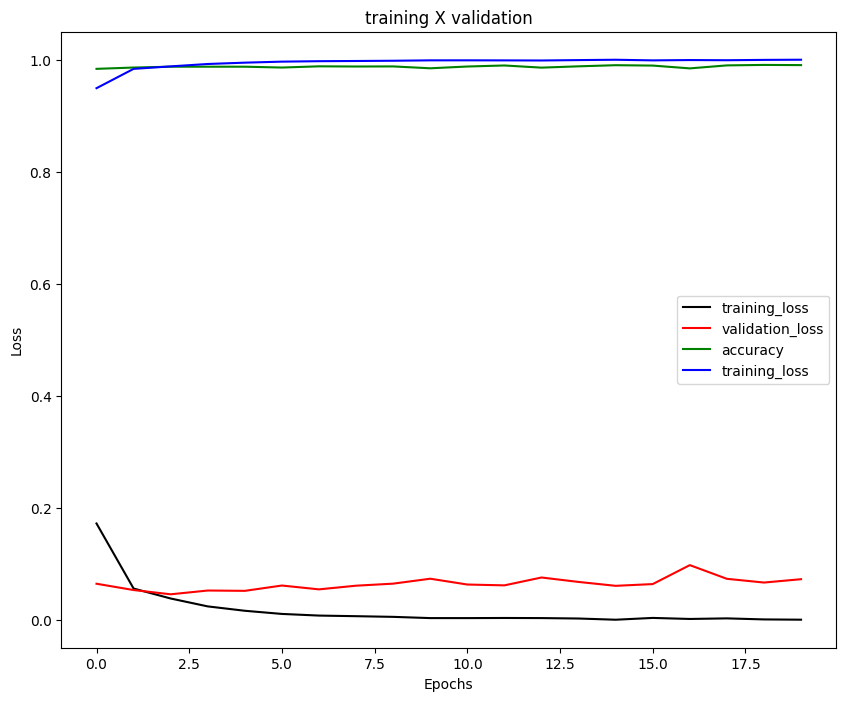

In [37]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

ax.set(title='training X validation')
ax.plot(processo.history['loss'], color='black', label='training_loss')
ax.plot(processo.history['val_loss'], color='red', label='validation_loss')
ax.plot(processo.history['val_accuracy'], color='green', label='accuracy')
ax.plot(processo.history['accuracy'], color='blue', label='training_loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()
